In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import os

In [2]:
os.chdir('../data')
#Вариант 1
df = pd.read_csv('moldova_cars_task.csv')

# Проверка данных и их предобработка

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 40671 non-null  object 
 2   Year                  40771 non-null  float64
 3   Style                 40938 non-null  object 
 4   Distance              40889 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          40779 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.8+ MB


In [4]:
df.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998.0,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012.0,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006.0,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0


In [5]:
cols = df.columns.tolist()
cols = [col.lower().replace(" ", "_") for col in cols]
df.columns = cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  41007 non-null  object 
 1   model                 40671 non-null  object 
 2   year                  40771 non-null  float64
 3   style                 40938 non-null  object 
 4   distance              40889 non-null  float64
 5   engine_capacity(cm3)  41007 non-null  float64
 6   fuel_type             41007 non-null  object 
 7   transmission          40779 non-null  object 
 8   price(euro)           41007 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.8+ MB


In [6]:
if df.isnull().any().any():
    for column in df.columns:
        if df[column].dtype == 'int64':
            # Заполним пропуски медианой для целых чисел
            df[column].fillna(df[column].median(), inplace=True)
        elif df[column].dtype == 'float64':
            # Заполним пропуски средним значением для действительных чисел
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            # Заполним пропуски модой для остальных типов данных
            df[column].fillna(df[column].mode().iloc[0], inplace=True)
df.isna().sum()

make                    0
model                   0
year                    0
style                   0
distance                0
engine_capacity(cm3)    0
fuel_type               0
transmission            0
price(euro)             0
dtype: int64

In [7]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [8]:
for column in df.columns:
    if df[column].dtype == float:
        df[column] = df[column].astype(int)

df = pd.get_dummies(df)
df

,year,distance,engine_capacity(cm3),price(euro),make_ARO,make_Abarth,make_Acura,make_Alfa Romeo,make_Alta marca,make_Aston Martin,...,style_Sedan,style_Universal,fuel_type_Diesel,fuel_type_Electric,fuel_type_Hybrid,fuel_type_Metan/Propan,fuel_type_Petrol,fuel_type_Plug-in Hybrid,transmission_Automatic,transmission_Manual
0,2011,195000,1800,7750,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,2014,135000,1500,8550,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
2,1998,1,1400,2200,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,2012,110000,1500,6550,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
4,2006,200000,1600,4100,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37395,2002,225000,1800,4400,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
37396,2015,89000,1500,7000,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
37397,2009,225,1500,4500,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
37398,2006,370000,2000,4000,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


# EDA

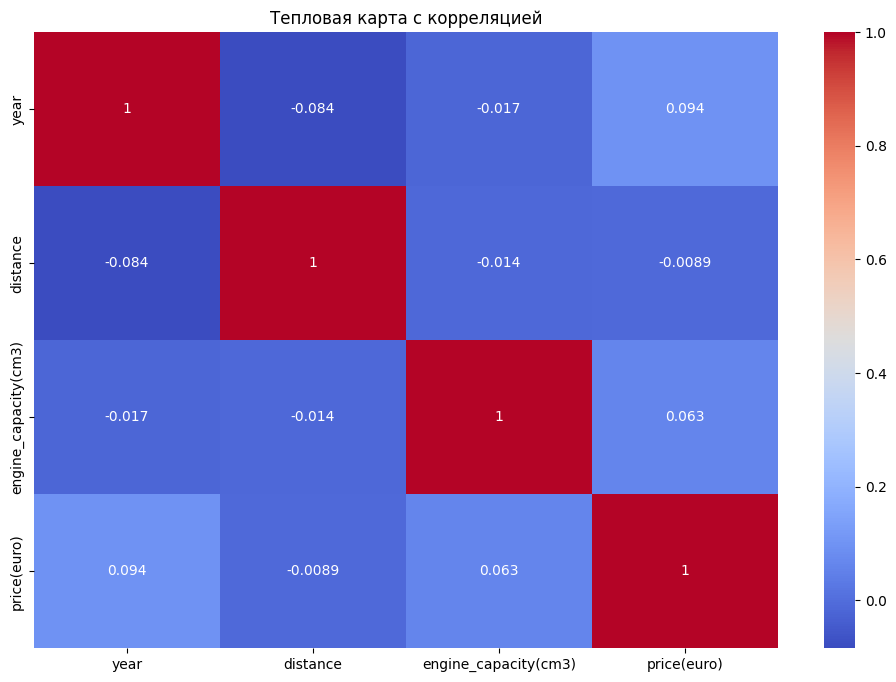

In [9]:
plt.figure(figsize=(12, 8))
selected_cols = ['year','distance','engine_capacity(cm3)','price(euro)']
selected_df = df[selected_cols]
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm')
plt.title('Тепловая карта с корреляцией')
plt.show()

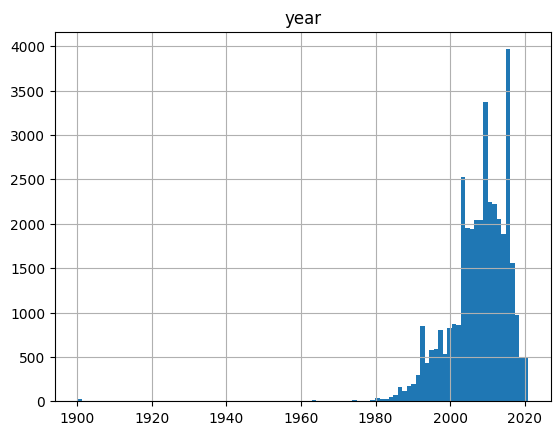

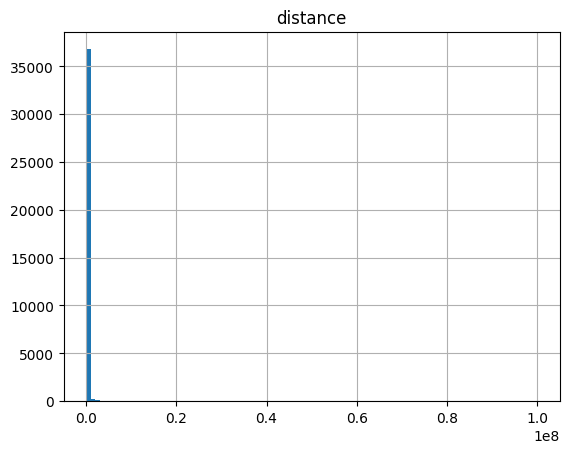

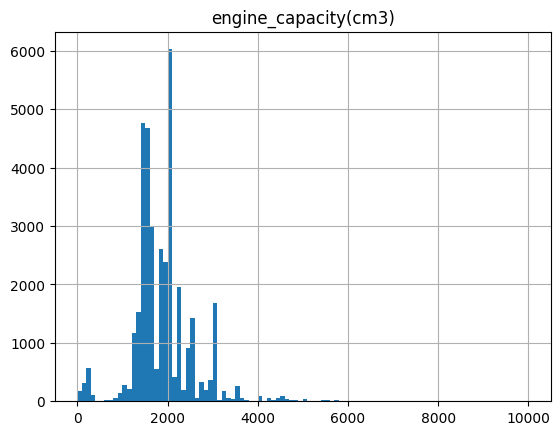

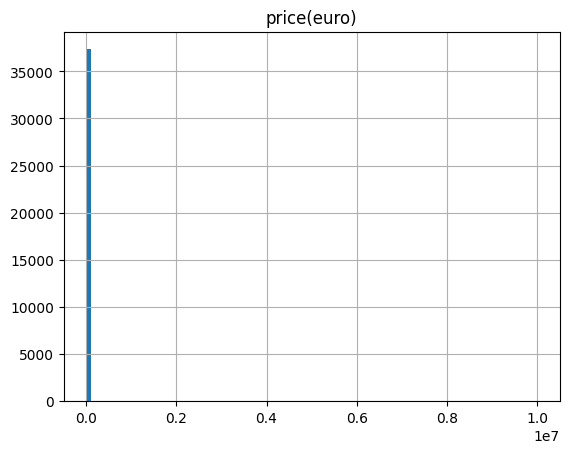

In [10]:
columns = ['year','distance','engine_capacity(cm3)','price(euro)']

for col in columns:
    df.hist(col, bins=100)

In [11]:
df.describe()[['year','distance','engine_capacity(cm3)','price(euro)']]

,year,distance,engine_capacity(cm3),price(euro)
count,37400.000000,3.740000e+04,37400.000000,3.740000e+04
mean,2007.715107,4.753507e+05,1858.674144,9.572425e+03
std,8.271580,4.582855e+06,707.121519,5.273907e+04
min,1900.000000,0.000000e+00,0.000000,1.000000e+00
25%,2004.000000,9.000000e+04,1499.000000,3.333000e+03
50%,2009.000000,1.700000e+05,1800.000000,6.499000e+03
75%,2014.000000,2.309292e+05,2000.000000,1.180000e+04
max,2021.000000,1.000000e+08,9999.000000,1.000000e+07


In [12]:
outlier = df[['year','distance','engine_capacity(cm3)','price(euro)']]
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3-Q1
df_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
index_list = list(df_filtered.index.values)
df_filtered = df[df.index.isin(index_list)]
df_filtered.head()

,year,distance,engine_capacity(cm3),price(euro),make_ARO,make_Abarth,make_Acura,make_Alfa Romeo,make_Alta marca,make_Aston Martin,...,style_Sedan,style_Universal,fuel_type_Diesel,fuel_type_Electric,fuel_type_Hybrid,fuel_type_Metan/Propan,fuel_type_Petrol,fuel_type_Plug-in Hybrid,transmission_Automatic,transmission_Manual
0,2011,195000,1800,7750,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,2014,135000,1500,8550,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
2,1998,1,1400,2200,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,2012,110000,1500,6550,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
4,2006,200000,1600,4100,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True


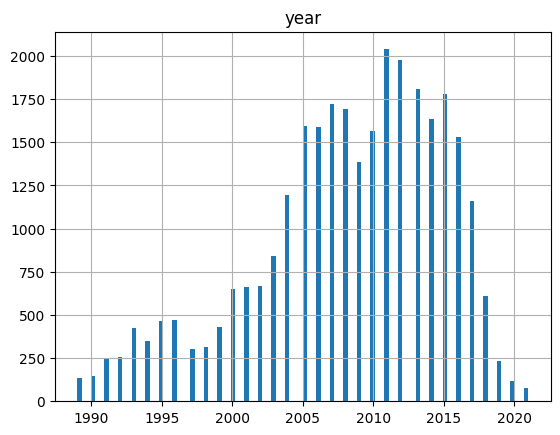

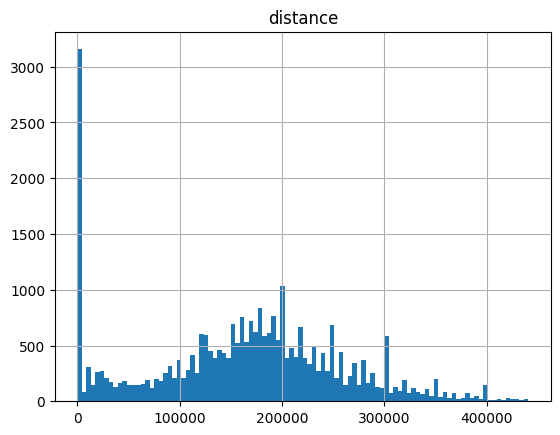

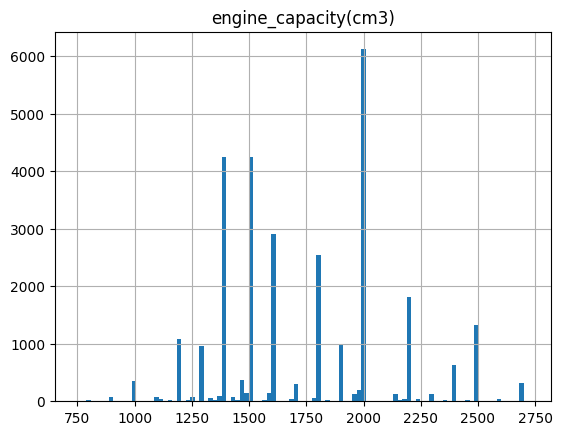

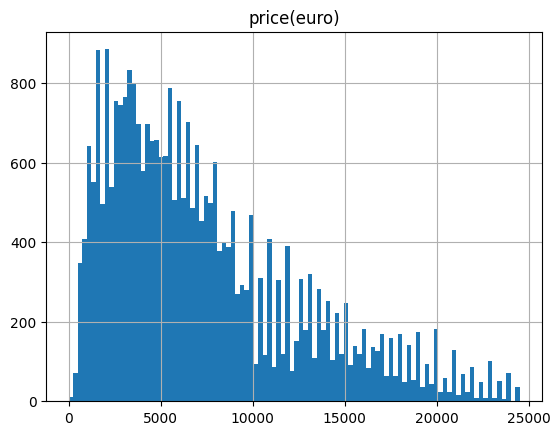

In [13]:
filtered_outlier = df_filtered[['year','distance','engine_capacity(cm3)','price(euro)']]

for col in filtered_outlier:
    df_filtered.hist(col, bins=100)

In [14]:
df_filtered.head()

,year,distance,engine_capacity(cm3),price(euro),make_ARO,make_Abarth,make_Acura,make_Alfa Romeo,make_Alta marca,make_Aston Martin,...,style_Sedan,style_Universal,fuel_type_Diesel,fuel_type_Electric,fuel_type_Hybrid,fuel_type_Metan/Propan,fuel_type_Petrol,fuel_type_Plug-in Hybrid,transmission_Automatic,transmission_Manual
0,2011,195000,1800,7750,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,2014,135000,1500,8550,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
2,1998,1,1400,2200,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,2012,110000,1500,6550,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
4,2006,200000,1600,4100,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True


# Обучение с учителем. Задача регрессии

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

### Первый шаг: выделение целевого признака и предикторов

In [16]:
y = df_filtered["price(euro)"]
X = df_filtered.drop(["price(euro)"], axis=1)

X_single = df_filtered['year'].values.reshape(-1, 1)

### Второй шаг: разделение данных на обучающую и тестовую выборки

In [17]:
X_train, X_test, X_train_single, X_test_single, y_train, y_test = train_test_split(X, X_single, y, test_size=0.2)

### Линейная регрессия в sklearn

### Подбираем параметр альфа

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
# для поиска гиперпараметров мы всегда сначала формируем словарь
# ключами словаря являются названия гиперпараметров
# значениями - список (или массив numpy) с возможными значениями
# параметры описываются в документации к моделям, так что можно и нужно гуглить
parameters = {'alpha': np.arange(0, 1, 0.1)}

# а теперь пробуем подобрать значение этого гиперпараметра с помощью GridSearchCV
# оборачиваем нашу модель в объект GridSearchCV, туда же передаем словарь с параметрами и стартуем обучение
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train_single, y_train)
# выводим оптимальные значения параметров
ridge_optimal.best_params_

{'alpha': 0.9}

In [19]:
# Простая линейная регрессия
simple_linear_reg = LinearRegression()
simple_linear_reg.fit(X_train_single, y_train)

# L1 регуляризация (Lasso)
lasso_reg = Lasso(alpha=0.7)
lasso_reg.fit(X_train_single, y_train)

# L2 регуляризация (Ridge)
ridge_reg = Ridge(alpha=0.7)
ridge_reg.fit(X_train_single, y_train)

Ridge(alpha=0.7)

In [20]:
def calculate_metrics(model, X, y_true):
    y_pred = model.predict(X)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return r2, mae, mse, rmse, mape

# Вычислить метрики для каждой модели
metrics_simple_linear = calculate_metrics(simple_linear_reg, X_test_single, y_test)
metrics_lasso = calculate_metrics(lasso_reg, X_test_single, y_test)
metrics_ridge = calculate_metrics(ridge_reg, X_test_single, y_test)

In [21]:
print(f'MAE: {metrics_simple_linear[1]}')
print(f'MSE: {metrics_simple_linear[2]}')
print(f'RMSE: {metrics_simple_linear[3]}')
print(f'MAPE: {metrics_simple_linear[4]}')
print(f'R^2: {metrics_simple_linear[0]}')

MAE: 2938.5808815176524
MSE: 14750545.311928816
RMSE: 3840.64386684431
MAPE: 70.63902511315344
R^2: 0.45894858392785454


In [22]:
print(f'MAE: {metrics_lasso[1]}')
print(f'MSE: {metrics_lasso[2]}')
print(f'RMSE: {metrics_lasso[3]}')
print(f'MAPE: {metrics_lasso[4]}')
print(f'R^2: {metrics_lasso[0]}')

MAE: 2938.569749597944
MSE: 14750518.396381574
RMSE: 3840.6403628017
MAPE: 70.63819178720796
R^2: 0.45894957119270763


In [23]:
print(f'MAE: {metrics_ridge[1]}')
print(f'MSE: {metrics_ridge[2]}')
print(f'RMSE: {metrics_ridge[3]}')
print(f'MAPE: {metrics_ridge[4]}')
print(f'R^2: {metrics_ridge[0]}')

MAE: 2938.58062973146
MSE: 14750544.7029027
RMSE: 3840.6437875573283
MAPE: 70.6390062646553
R^2: 0.45894860626699086


## Пайплайн

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
models = [
    ('Linear', LinearRegression()),
    ('Ridge', Ridge(alpha=0.8)),
    ('Lasso', Lasso(alpha=0.8))
]

pipelines = []

for model_name, model in models:
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipelines.append((model_name, pipeline))

for model_name, pipeline in pipelines:
    pipeline.fit(X_train_single, y_train)

    metrics_pipe = calculate_metrics(pipeline, X_test_single, y_test)

    print(f"Model: {model_name}")
    print(f'MAE: {metrics_pipe[1]}')
    print(f'MSE: {metrics_pipe[2]}')
    print(f'RMSE: {metrics_pipe[3]}')
    print(f'MAPE: {metrics_pipe[4]}')
    print(f'R^2: {metrics_pipe[0]}')
    print("\n")

Model: Linear
MAE: 2938.580881517654
MSE: 14750545.31192882
RMSE: 3840.6438668443107
MAPE: 70.63902511315352
R^2: 0.4589485839278544


Model: Ridge
MAE: 2938.5678226108853
MSE: 14750513.739375625
RMSE: 3840.639756521773
MAPE: 70.63804753461108
R^2: 0.45894974201213223


Model: Lasso
MAE: 2938.495175645262
MSE: 14750338.645057175
RMSE: 3840.616961512457
MAPE: 70.63260924517202
R^2: 0.45895616448851806




### *Самостоятельно реализовать вычисление всех используемых метрик (в виде функций, принимающих два аргумента). Привести в таблице метрики, вычисленные с использование библиотеки Scikit-learn и соответствующими пользовательскими функциями.

In [25]:
def custom_r2(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_true - y_mean) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def custom_mae(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def custom_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def custom_rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

def custom_mape(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [26]:
# Предположим, что у вас есть модель simple_linear_reg и X_test_single, y_test
y_pred = simple_linear_reg.predict(X_test_single)

r2_custom = custom_r2(y_test, y_pred)
mae_custom = custom_mae(y_test, y_pred)
mse_custom = custom_mse(y_test, y_pred)
rmse_custom = custom_rmse(y_test, y_pred)
mape_custom = custom_mape(y_test, y_pred)

custom = [r2_custom, mae_custom, mse_custom, rmse_custom, mape_custom]

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_sklearn = r2_score(y_test, y_pred)
mae_sklearn = mean_absolute_error(y_test, y_pred)
mse_sklearn = mean_squared_error(y_test, y_pred)
rmse_sklearn = np.sqrt(mse_sklearn)

In [28]:
print(r2_custom == r2_sklearn)
print(mae_custom == mae_sklearn)
print(mse_custom == mse_sklearn)
print(rmse_custom == rmse_sklearn)

True
True
True
True


### Задание 8

в нем нужно выполнить one-hot кодирование и найти метрики уже с ним

In [29]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
# для поиска гиперпараметров мы всегда сначала формируем словарь
# ключами словаря являются названия гиперпараметров
# значениями - список (или массив numpy) с возможными значениями
# параметры описываются в документации к моделям, так что можно и нужно гуглить
parameters = {'alpha': np.arange(0, 1, 0.1)}

# а теперь пробуем подобрать значение этого гиперпараметра с помощью GridSearchCV
# оборачиваем нашу модель в объект GridSearchCV, туда же передаем словарь с параметрами и стартуем обучение
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
# выводим оптимальные значения параметров
ridge_optimal.best_params_

{'alpha': 0.8}

In [32]:
from sklearn.linear_model import ElasticNet
# L1 регуляризация (Lasso)
lasso_reg = Lasso(alpha=0.8)
lasso_reg.fit(X_train, y_train)

# L2 регуляризация (Ridge)
ridge_reg = Ridge(alpha=0.8)
ridge_reg.fit(X_train, y_train)

elasticnet_reg = ElasticNet(alpha=0.8)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.8)

In [33]:
metrics_lasso = calculate_metrics(lasso_reg, X_test, y_test)
metrics_ridge = calculate_metrics(ridge_reg, X_test, y_test)
elasticnet_reg = calculate_metrics(elasticnet_reg, X_test, y_test)

In [34]:
print(f'MAE: {metrics_lasso[1]}')
print(f'MSE: {metrics_lasso[2]}')
print(f'RMSE: {metrics_lasso[3]}')
print(f'MAPE: {metrics_lasso[4]}')
print(f'R^2: {metrics_lasso[0]}')

MAE: 1821.1104538175578
MSE: 7247491.951771156
RMSE: 2692.1166304176268
MAPE: 47.48501475899927
R^2: 0.7341613004431693


In [35]:
print(f'MAE: {metrics_ridge[1]}')
print(f'MSE: {metrics_ridge[2]}')
print(f'RMSE: {metrics_ridge[3]}')
print(f'MAPE: {metrics_ridge[4]}')
print(f'R^2: {metrics_ridge[0]}')

MAE: 1780.636747051378
MSE: 6924801.634049665
RMSE: 2631.501783022323
MAPE: 47.318629431913834
R^2: 0.7459976122312353


In [36]:
print(f'MAE: {elasticnet_reg[1]}')
print(f'MSE: {elasticnet_reg[2]}')
print(f'RMSE: {elasticnet_reg[3]}')
print(f'MAPE: {elasticnet_reg[4]}')
print(f'R^2: {elasticnet_reg[0]}')

MAE: 2284.1974858524413
MSE: 9993920.055503707
RMSE: 3161.3161903713
MAPE: 61.61432856747342
R^2: 0.633422054317595
